# Task 1: Natural Gas Price Data Analysis
This notebook imports the Nat_Gas.csv data and analyzes natural gas price data from the CSV file.

Dataset Shape: (48, 2)
Columns: ['Dates', 'Prices']
Data Types:
Dates      object
Prices    float64
dtype: object

First 5 rows:
      Dates  Prices
0  10/31/20    10.1
1  11/30/20    10.3
2  12/31/20    11.0
3   1/31/21    10.9
4   2/28/21    10.9


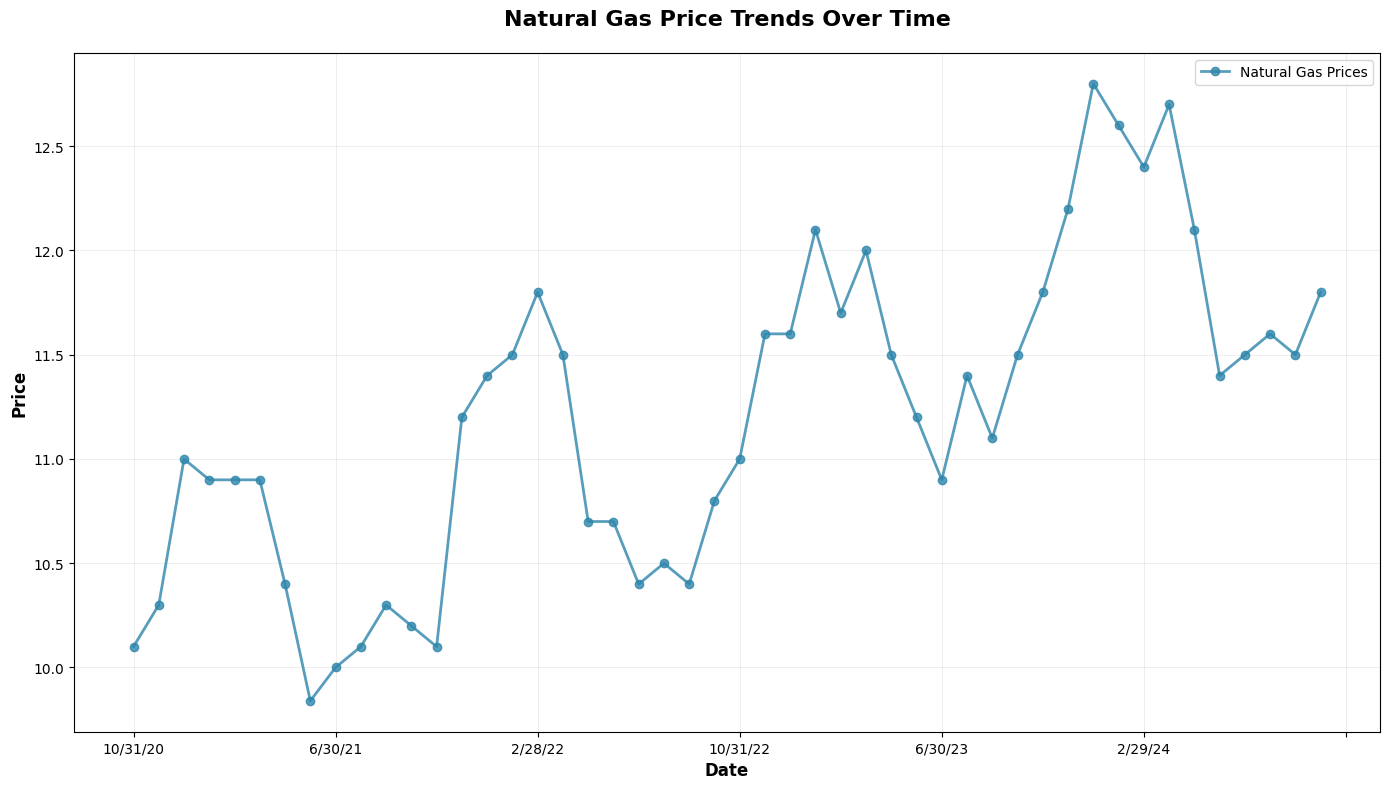

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from matplotlib.dates import DateLocator, DateFormatter

from utils import load_data, plot_data, feature_engineering, plot_model_predictions, predict_future_months, plot_future_predictions


# Load the data
nat_gas_df = load_data('Nat_Gas.csv')
# Plot the natural gas price data
plot_data(nat_gas_df)


## Prepare the Data
We are going to add extra time features to the data to help the model learn. Then we have to split up the model into train and val groups of data. 

In [2]:
# Feature Engineering
nat_gas_added_features = feature_engineering(nat_gas_df)

Dataset Shape: (48, 7)
Columns: ['Prices', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'Quarter']
Data Types:
Prices       float64
Year           int32
Month          int32
Day            int32
DayOfWeek      int32
DayOfYear      int32
Quarter        int32
dtype: object

First 5 rows:
            Prices  Year  Month  Day  DayOfWeek  DayOfYear  Quarter
Dates                                                              
2020-10-31    10.1  2020     10   31          5        305        4
2020-11-30    10.3  2020     11   30          0        335        4
2020-12-31    11.0  2020     12   31          3        366        4
2021-01-31    10.9  2021      1   31          6         31        1
2021-02-28    10.9  2021      2   28          6         59        1


/Users/johansweldens/Documents/finance_projects/finance/jpm_project/task_1/utils.py:122: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [3]:
# Separate the target variable (Prices) and the features (time-related features)
X = nat_gas_added_features[['Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'Quarter']]
y = nat_gas_added_features['Prices']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Model and show its results

In [4]:
# Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=14)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_val = rf_model.predict(X_val)
y_pred_train = rf_model.predict(X_train)

# Calculate the RMSE
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Calculate the R-squared
r2_val = r2_score(y_val, y_pred_val)
r2_train = r2_score(y_train, y_pred_train)

# Display the RMSE and R-squared
print(f"RMSE val: {rmse_val}")
print(f"RMSE Train: {rmse_train}")
print(f"R-squared val: {r2_val}")
print(f"R-squared Train: {r2_train}")

RMSE val: 0.3134142306915907
RMSE Train: 0.1648890376490892
R-squared val: 0.7953573333333299
R-squared Train: 0.9524483363718229


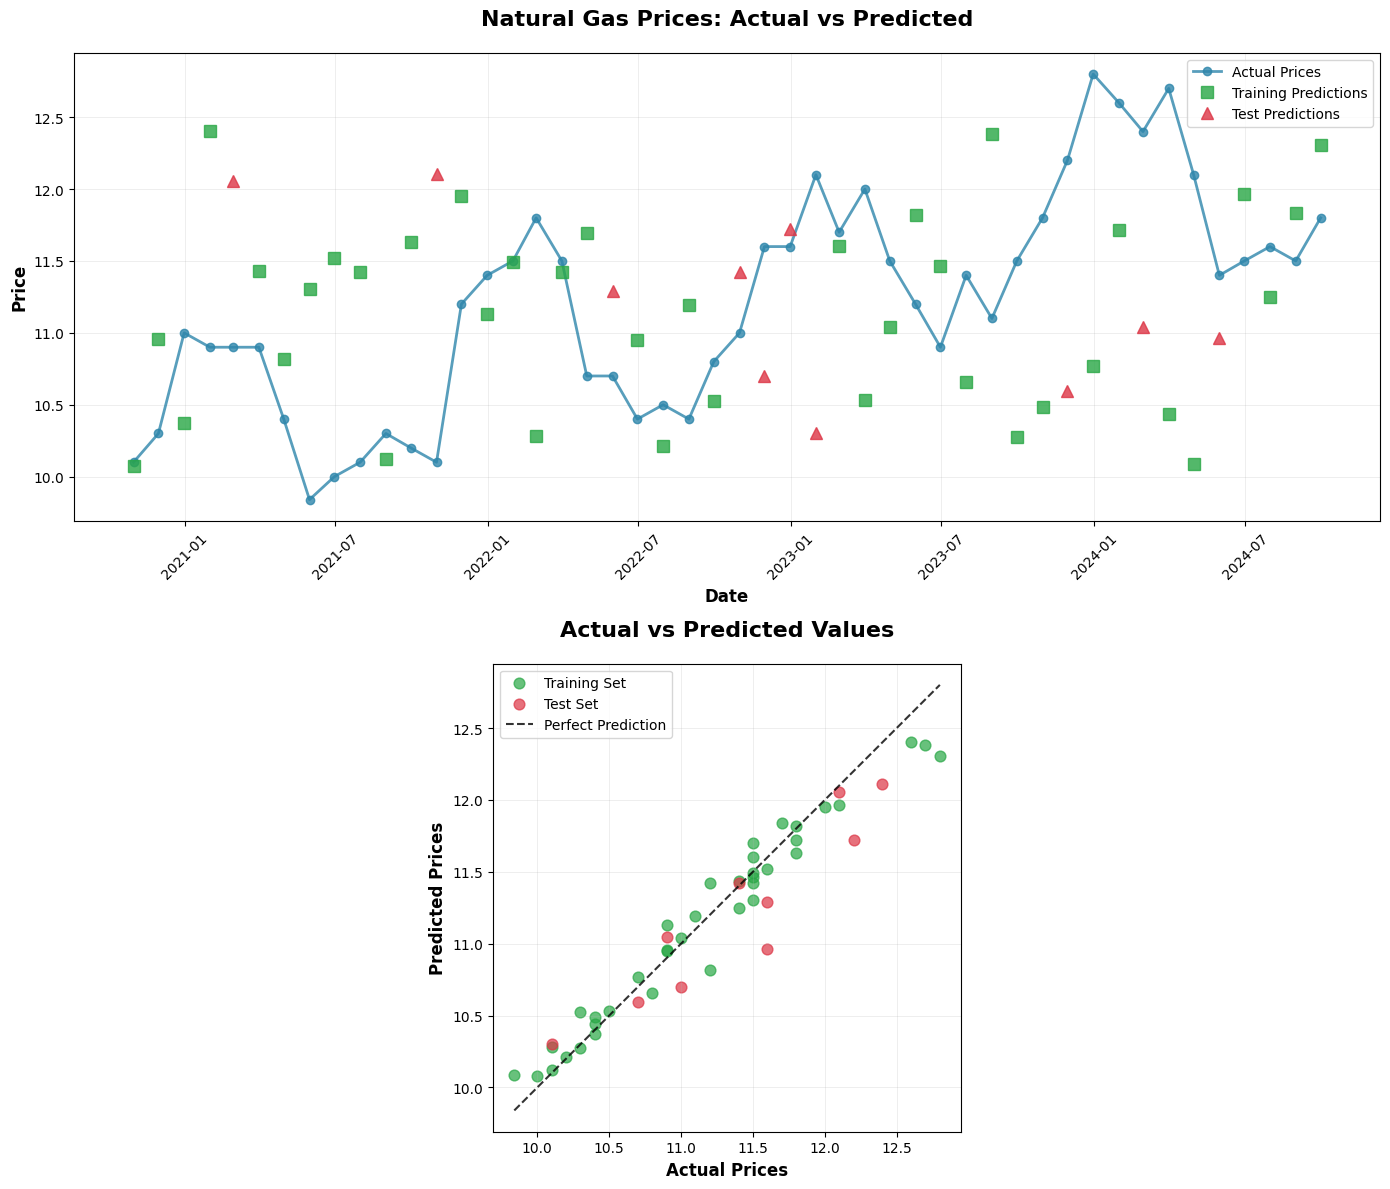

In [5]:
# Plot the Model training and testing predictions

plot_model_predictions(y_pred_val, y_pred_train, nat_gas_df, X_train, X_val)

# Make Predictions on 12 future Months


Generated predictions for 24 months starting from 2024-10-31
Future predictions shape: (24, 7)


/Users/johansweldens/Documents/finance_projects/finance/jpm_project/task_1/utils.py:162: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),


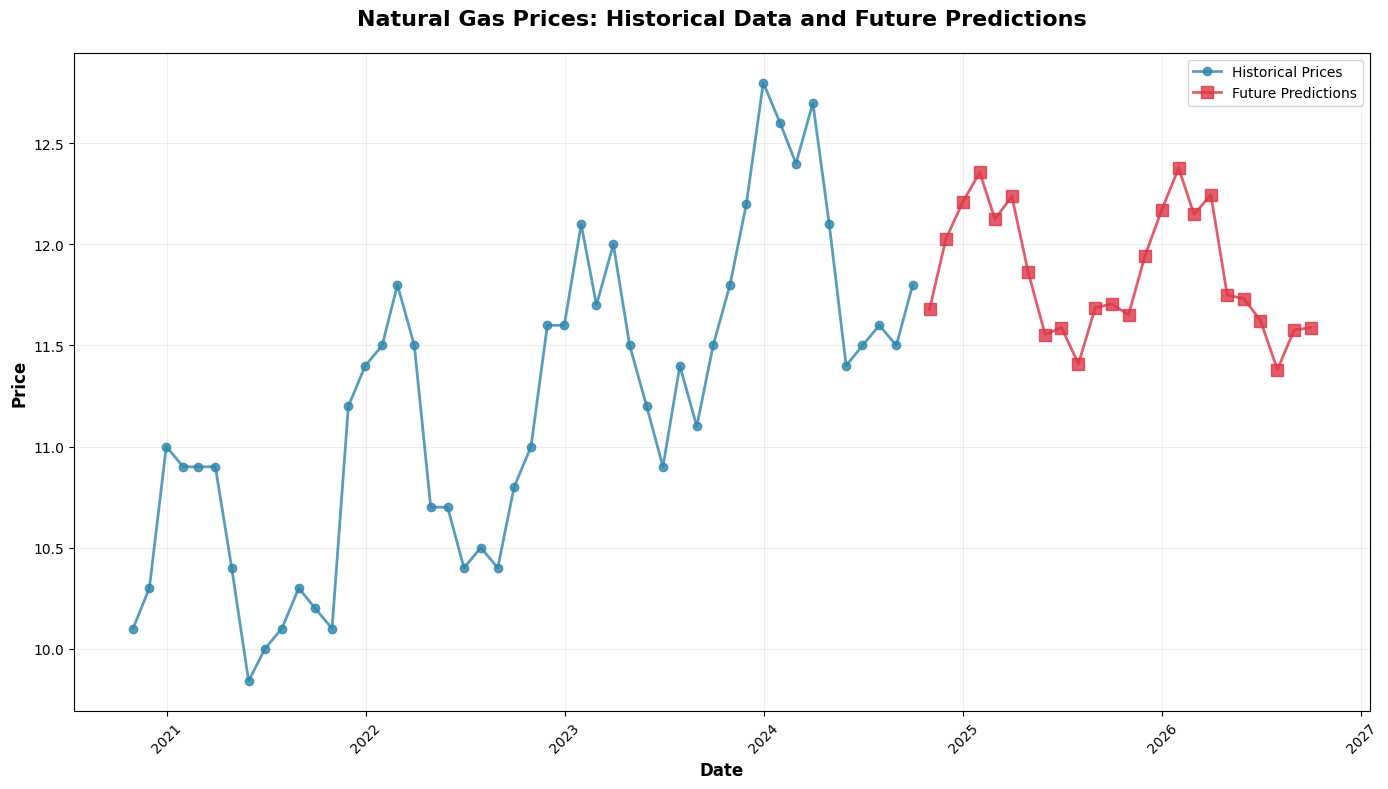

            Predicted_Prices
Dates                       
2024-10-31            11.679
2024-11-30            12.027
2024-12-31            12.210
2025-01-31            12.356
2025-02-28            12.125
2025-03-31            12.238
2025-04-30            11.862
2025-05-31            11.554
2025-06-30            11.589
2025-07-31            11.409
2025-08-31            11.687
2025-09-30            11.706
2025-10-31            11.652
2025-11-30            11.942
2025-12-31            12.172
2026-01-31            12.378
2026-02-28            12.148
2026-03-31            12.245
2026-04-30            11.750
2026-05-31            11.731
2026-06-30            11.623
2026-07-31            11.381
2026-08-31            11.577
2026-09-30            11.588


In [7]:
# Generate future predictions
future_predictions = predict_future_months(rf_model, nat_gas_added_features, months_ahead=24)

# Plot the results
plot_future_predictions(nat_gas_added_features, future_predictions)

# View the predictions
print(future_predictions[['Predicted_Prices']])